## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0161312	total: 59.8ms	remaining: 59.7s
1:	learn: 0.9971555	total: 60.7ms	remaining: 30.3s
2:	learn: 0.9777786	total: 61.7ms	remaining: 20.5s
3:	learn: 0.9613363	total: 62.8ms	remaining: 15.6s
4:	learn: 0.9438325	total: 63.7ms	remaining: 12.7s
5:	learn: 0.9265206	total: 64.6ms	remaining: 10.7s
6:	learn: 0.9111277	total: 65.6ms	remaining: 9.3s
7:	learn: 0.8941910	total: 66.6ms	remaining: 8.25s
8:	learn: 0.8778500	total: 67.4ms	remaining: 7.42s
9:	learn: 0.8613187	total: 68.3ms	remaining: 6.76s
10:	learn: 0.8457965	total: 69.1ms	remaining: 6.22s
11:	learn: 0.8312653	total: 69.9ms	remaining: 5.76s
12:	learn: 0.8162415	total: 70.6ms	remaining: 5.36s
13:	learn: 0.8006973	total: 71.5ms	remaining: 5.03s
14:	learn: 0.7871774	total: 72.3ms	remaining: 4.74s
15:	learn: 0.7721535	total: 73ms	remaining: 4.49s
16:	learn: 0.7586600	total: 73.8ms	remaining: 4.27s
17:	learn: 0.7459278	total: 74.7ms	remaining: 4.07s
18:	learn: 0.7331878	total: 75.5ms	remaining: 3

56:	learn: 0.4430851	total: 107ms	remaining: 1.77s
57:	learn: 0.4392496	total: 108ms	remaining: 1.75s
58:	learn: 0.4342860	total: 109ms	remaining: 1.74s
59:	learn: 0.4309510	total: 110ms	remaining: 1.72s
60:	learn: 0.4268535	total: 110ms	remaining: 1.7s
61:	learn: 0.4223859	total: 111ms	remaining: 1.68s
62:	learn: 0.4183551	total: 112ms	remaining: 1.67s
63:	learn: 0.4145530	total: 113ms	remaining: 1.65s
64:	learn: 0.4108362	total: 114ms	remaining: 1.64s
65:	learn: 0.4073172	total: 114ms	remaining: 1.62s
66:	learn: 0.4038595	total: 115ms	remaining: 1.61s
67:	learn: 0.4003961	total: 116ms	remaining: 1.59s
68:	learn: 0.3976533	total: 117ms	remaining: 1.58s
69:	learn: 0.3932948	total: 118ms	remaining: 1.57s
70:	learn: 0.3902712	total: 119ms	remaining: 1.55s
71:	learn: 0.3868547	total: 120ms	remaining: 1.54s
72:	learn: 0.3839780	total: 120ms	remaining: 1.53s
73:	learn: 0.3810719	total: 121ms	remaining: 1.51s
74:	learn: 0.3779694	total: 122ms	remaining: 1.5s
75:	learn: 0.3748915	total: 123ms

160:	learn: 0.2530251	total: 192ms	remaining: 1s
161:	learn: 0.2521377	total: 193ms	remaining: 999ms
162:	learn: 0.2514095	total: 194ms	remaining: 997ms
163:	learn: 0.2507238	total: 195ms	remaining: 993ms
164:	learn: 0.2500354	total: 196ms	remaining: 990ms
165:	learn: 0.2492524	total: 196ms	remaining: 987ms
166:	learn: 0.2480861	total: 197ms	remaining: 983ms
167:	learn: 0.2472723	total: 198ms	remaining: 980ms
168:	learn: 0.2467194	total: 199ms	remaining: 977ms
169:	learn: 0.2460586	total: 199ms	remaining: 974ms
170:	learn: 0.2456486	total: 200ms	remaining: 971ms
171:	learn: 0.2450144	total: 201ms	remaining: 968ms
172:	learn: 0.2442437	total: 202ms	remaining: 965ms
173:	learn: 0.2439415	total: 203ms	remaining: 962ms
174:	learn: 0.2432248	total: 203ms	remaining: 959ms
175:	learn: 0.2423625	total: 204ms	remaining: 957ms
176:	learn: 0.2414478	total: 205ms	remaining: 954ms
177:	learn: 0.2405974	total: 206ms	remaining: 952ms
178:	learn: 0.2398824	total: 207ms	remaining: 949ms
179:	learn: 0.2

286:	learn: 0.1837821	total: 297ms	remaining: 738ms
287:	learn: 0.1833268	total: 298ms	remaining: 737ms
288:	learn: 0.1827824	total: 299ms	remaining: 735ms
289:	learn: 0.1821606	total: 300ms	remaining: 734ms
290:	learn: 0.1818022	total: 301ms	remaining: 733ms
291:	learn: 0.1813165	total: 302ms	remaining: 732ms
292:	learn: 0.1807939	total: 303ms	remaining: 730ms
293:	learn: 0.1803259	total: 304ms	remaining: 729ms
294:	learn: 0.1799335	total: 305ms	remaining: 729ms
295:	learn: 0.1791990	total: 306ms	remaining: 727ms
296:	learn: 0.1787848	total: 307ms	remaining: 726ms
297:	learn: 0.1784480	total: 308ms	remaining: 725ms
298:	learn: 0.1783585	total: 309ms	remaining: 724ms
299:	learn: 0.1780120	total: 310ms	remaining: 722ms
300:	learn: 0.1776033	total: 310ms	remaining: 721ms
301:	learn: 0.1772711	total: 311ms	remaining: 719ms
302:	learn: 0.1771444	total: 312ms	remaining: 718ms
303:	learn: 0.1768436	total: 313ms	remaining: 717ms
304:	learn: 0.1763227	total: 314ms	remaining: 715ms
305:	learn: 

384:	learn: 0.1478274	total: 382ms	remaining: 611ms
385:	learn: 0.1475030	total: 383ms	remaining: 610ms
386:	learn: 0.1470896	total: 384ms	remaining: 608ms
387:	learn: 0.1467480	total: 385ms	remaining: 607ms
388:	learn: 0.1466884	total: 386ms	remaining: 606ms
389:	learn: 0.1462314	total: 386ms	remaining: 604ms
390:	learn: 0.1461473	total: 387ms	remaining: 603ms
391:	learn: 0.1458777	total: 388ms	remaining: 602ms
392:	learn: 0.1454700	total: 389ms	remaining: 601ms
393:	learn: 0.1450492	total: 390ms	remaining: 599ms
394:	learn: 0.1446837	total: 390ms	remaining: 598ms
395:	learn: 0.1443946	total: 391ms	remaining: 597ms
396:	learn: 0.1440853	total: 392ms	remaining: 595ms
397:	learn: 0.1437383	total: 393ms	remaining: 594ms
398:	learn: 0.1433857	total: 394ms	remaining: 593ms
399:	learn: 0.1430228	total: 395ms	remaining: 592ms
400:	learn: 0.1427780	total: 395ms	remaining: 591ms
401:	learn: 0.1425623	total: 396ms	remaining: 589ms
402:	learn: 0.1423208	total: 397ms	remaining: 588ms
403:	learn: 

509:	learn: 0.1158991	total: 488ms	remaining: 468ms
510:	learn: 0.1156711	total: 488ms	remaining: 467ms
511:	learn: 0.1153743	total: 489ms	remaining: 466ms
512:	learn: 0.1151397	total: 490ms	remaining: 465ms
513:	learn: 0.1149707	total: 491ms	remaining: 464ms
514:	learn: 0.1148027	total: 492ms	remaining: 463ms
515:	learn: 0.1146699	total: 493ms	remaining: 462ms
516:	learn: 0.1145987	total: 493ms	remaining: 461ms
517:	learn: 0.1143239	total: 494ms	remaining: 460ms
518:	learn: 0.1141288	total: 495ms	remaining: 459ms
519:	learn: 0.1138910	total: 496ms	remaining: 458ms
520:	learn: 0.1136498	total: 497ms	remaining: 457ms
521:	learn: 0.1135996	total: 498ms	remaining: 456ms
522:	learn: 0.1134443	total: 499ms	remaining: 455ms
523:	learn: 0.1131606	total: 500ms	remaining: 454ms
524:	learn: 0.1128976	total: 501ms	remaining: 453ms
525:	learn: 0.1126469	total: 501ms	remaining: 452ms
526:	learn: 0.1124966	total: 502ms	remaining: 451ms
527:	learn: 0.1122578	total: 503ms	remaining: 450ms
528:	learn: 

612:	learn: 0.0967232	total: 573ms	remaining: 362ms
613:	learn: 0.0965341	total: 574ms	remaining: 361ms
614:	learn: 0.0963933	total: 575ms	remaining: 360ms
615:	learn: 0.0961386	total: 576ms	remaining: 359ms
616:	learn: 0.0959966	total: 576ms	remaining: 358ms
617:	learn: 0.0959669	total: 577ms	remaining: 357ms
618:	learn: 0.0959469	total: 578ms	remaining: 356ms
619:	learn: 0.0958171	total: 579ms	remaining: 355ms
620:	learn: 0.0956220	total: 580ms	remaining: 354ms
621:	learn: 0.0954687	total: 581ms	remaining: 353ms
622:	learn: 0.0952806	total: 581ms	remaining: 352ms
623:	learn: 0.0950523	total: 582ms	remaining: 351ms
624:	learn: 0.0948449	total: 583ms	remaining: 350ms
625:	learn: 0.0947297	total: 584ms	remaining: 349ms
626:	learn: 0.0946238	total: 585ms	remaining: 348ms
627:	learn: 0.0944016	total: 586ms	remaining: 347ms
628:	learn: 0.0941745	total: 586ms	remaining: 346ms
629:	learn: 0.0939600	total: 587ms	remaining: 345ms
630:	learn: 0.0937688	total: 588ms	remaining: 344ms
631:	learn: 

736:	learn: 0.0796053	total: 677ms	remaining: 242ms
737:	learn: 0.0794291	total: 678ms	remaining: 241ms
738:	learn: 0.0793422	total: 679ms	remaining: 240ms
739:	learn: 0.0792144	total: 680ms	remaining: 239ms
740:	learn: 0.0790260	total: 681ms	remaining: 238ms
741:	learn: 0.0789313	total: 681ms	remaining: 237ms
742:	learn: 0.0787753	total: 682ms	remaining: 236ms
743:	learn: 0.0786519	total: 683ms	remaining: 235ms
744:	learn: 0.0784907	total: 684ms	remaining: 234ms
745:	learn: 0.0783721	total: 685ms	remaining: 233ms
746:	learn: 0.0782113	total: 686ms	remaining: 232ms
747:	learn: 0.0780439	total: 687ms	remaining: 231ms
748:	learn: 0.0779851	total: 688ms	remaining: 230ms
749:	learn: 0.0777433	total: 688ms	remaining: 229ms
750:	learn: 0.0777291	total: 689ms	remaining: 229ms
751:	learn: 0.0776119	total: 690ms	remaining: 228ms
752:	learn: 0.0775418	total: 691ms	remaining: 227ms
753:	learn: 0.0775055	total: 692ms	remaining: 226ms
754:	learn: 0.0774498	total: 693ms	remaining: 225ms
755:	learn: 

839:	learn: 0.0692367	total: 763ms	remaining: 145ms
840:	learn: 0.0691403	total: 764ms	remaining: 144ms
841:	learn: 0.0691325	total: 765ms	remaining: 144ms
842:	learn: 0.0690666	total: 766ms	remaining: 143ms
843:	learn: 0.0689652	total: 767ms	remaining: 142ms
844:	learn: 0.0689519	total: 768ms	remaining: 141ms
845:	learn: 0.0688510	total: 768ms	remaining: 140ms
846:	learn: 0.0687676	total: 769ms	remaining: 139ms
847:	learn: 0.0686077	total: 770ms	remaining: 138ms
848:	learn: 0.0685017	total: 771ms	remaining: 137ms
849:	learn: 0.0683103	total: 772ms	remaining: 136ms
850:	learn: 0.0682850	total: 772ms	remaining: 135ms
851:	learn: 0.0681411	total: 773ms	remaining: 134ms
852:	learn: 0.0681336	total: 775ms	remaining: 134ms
853:	learn: 0.0681184	total: 775ms	remaining: 133ms
854:	learn: 0.0680682	total: 776ms	remaining: 132ms
855:	learn: 0.0680300	total: 777ms	remaining: 131ms
856:	learn: 0.0678882	total: 778ms	remaining: 130ms
857:	learn: 0.0678049	total: 779ms	remaining: 129ms
858:	learn: 

964:	learn: 0.0593908	total: 868ms	remaining: 31.5ms
965:	learn: 0.0593021	total: 869ms	remaining: 30.6ms
966:	learn: 0.0592851	total: 869ms	remaining: 29.7ms
967:	learn: 0.0592145	total: 870ms	remaining: 28.8ms
968:	learn: 0.0590948	total: 871ms	remaining: 27.9ms
969:	learn: 0.0590193	total: 872ms	remaining: 27ms
970:	learn: 0.0589235	total: 873ms	remaining: 26.1ms
971:	learn: 0.0588384	total: 874ms	remaining: 25.2ms
972:	learn: 0.0588340	total: 875ms	remaining: 24.3ms
973:	learn: 0.0587074	total: 876ms	remaining: 23.4ms
974:	learn: 0.0586449	total: 877ms	remaining: 22.5ms
975:	learn: 0.0585092	total: 878ms	remaining: 21.6ms
976:	learn: 0.0584570	total: 879ms	remaining: 20.7ms
977:	learn: 0.0583967	total: 880ms	remaining: 19.8ms
978:	learn: 0.0582411	total: 881ms	remaining: 18.9ms
979:	learn: 0.0581739	total: 881ms	remaining: 18ms
980:	learn: 0.0580827	total: 882ms	remaining: 17.1ms
981:	learn: 0.0580542	total: 883ms	remaining: 16.2ms
982:	learn: 0.0579798	total: 884ms	remaining: 15.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

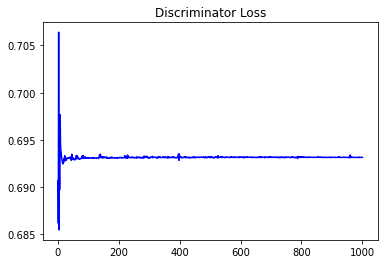

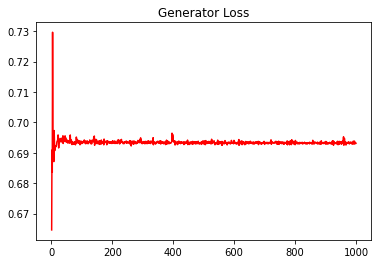

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07136515743473873


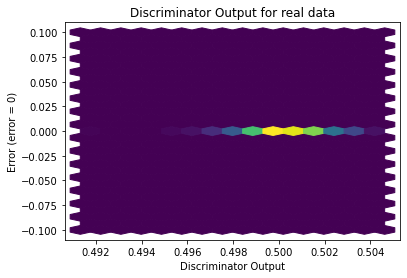

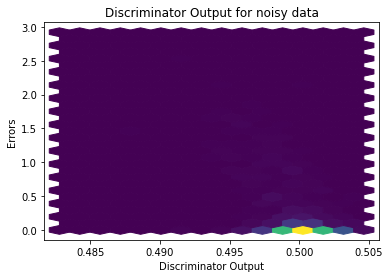

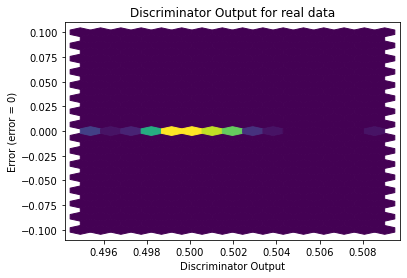

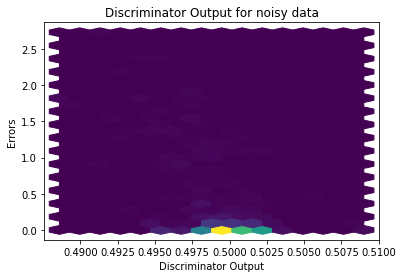

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


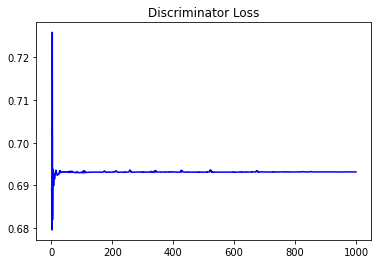

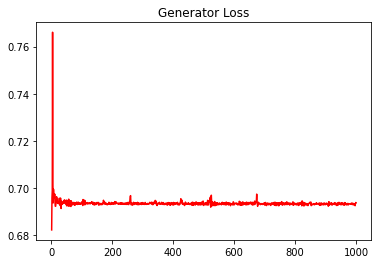

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07947481470523574


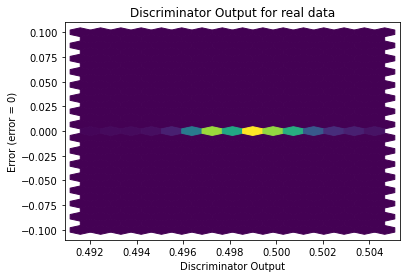

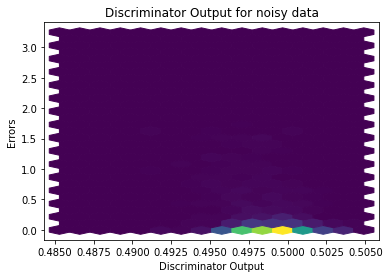

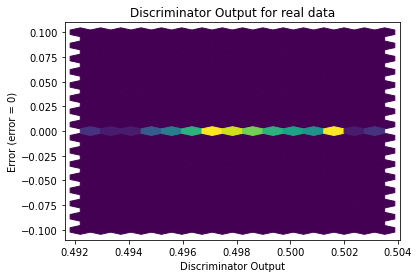

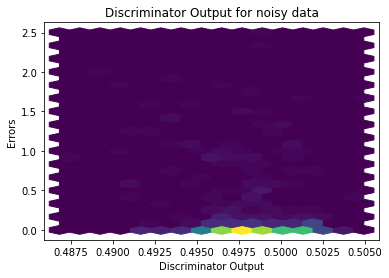

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2814]], requires_grad=True)
